<font size="3">
Celem projektu jest zaimplementowanie i przeprowadzanie analizy porównawczej trzech algorytmów wyznaczania wartości i wektorów własnych macierzy z pokazaniem co najmniej dwóch przykładów zastosowania w analizie danych (np. wyznaczanie minimum formy kwadratowej x^TAx, PCA, SVD, pinv, itp...)

Proponowane aspekty podlegające porównaniu:
<ul>
    <li>ogólność i stabilność metod (analiza dziedziny z możliwością zastosowania),</li>
    <li>zajętość pamięciowa,</li>
    <li>obciążenie procesora,</li>
    <li>wrażliwość na błędy danych,</li>
    <li>ograniczenia co do rozmiaru macierzy.</li>
</ul>

Proponowane algorytmy (proszę samodzielnie wybrać 3):
<ul>
    <li>QR,</li>
    <li>Metoda potęgowa,</li>
    <li>Householder tranformation,</li>
    <li>Lanczos algorithm,</li>
    <li>Jacobie eigenvalue algorithm,</li>
    <li>Locally Optimal Block Preconditioned Conjugate Gradient (LOBPCG)</li>
</ul>
Implementacja algorytmów musi być wykonana w sposób możliwie efektywny i kontrolowany.
Oznacza to, że należy dołożyć starań, aby uruchamiany kod był możliwie zoptymalizowany.

Raport końcowy powinien składać się z czterech części:

<ol>
    <li>wstępu precyzującego jakie algorytmy i w jakim języku zostały zaimplementowane;</li>
    <li>opisu badania, przedstawiającego wybrane przypadki testowe (rodzaje macierzy i jakie cechy tymi macierzami zamierzaliście testować), aspekty porównania oraz (najważniejsze) sposoby i warunki ich pomiaru; w warunkach pomiaru proszę uwzględnić parametry środowiska uruchomieniowego: rozmiar i prędkość pamięci, model procesora, model i typ dysku; niezbędne jest wyszczególnienie wszystkich zastosowanych optymalizacji algorytmów;</li>
    <li>sekcji z wynikami przedstawionymi w odpowiedniej formie wizualnej;</li>
    <li>podsumowania, odnoszącego się do wyników, obiektywnie zestawiających cechy charakterystyczne tych algorytmów; należy skonfrontować uzyskane wyniki ze spodziewanymi; warto odnieść się w dyskusji do aspektu związane z implementacją algorytmów.
    </li>
</ol>
W raporcie końcowym należy między innymi załączyć wykresy prezentujące przebiegi procesu zbiegania się do rozwiązania.

### Pierwszy kamień milowy (10.05 23:59)
- implementacja trzech algorytmów (potęgowa, jacobi, qr),
- optymalizacja (typy, ?),
- testy - wstępne, różne wielkości macierzy, na razie losowe macierze?,
- sprawozdanie - wstępny opis algorytmów, krótki, złożoność obliczeniowa, charakterystka (podział na podstawie obrazka z http://home.agh.edu.pl/~chwiej/mn/problem_wlasny_2016.pdf), wstępny wykres zbieżności, krótki opis testów (tabelka).


### Materiały: 
- performance - https://docs.julialang.org/en/v1/manual/performance-tips/
- Python różnice - https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python
- http://home.agh.edu.pl/~chwiej/mn/problem_wlasny_2016.pdf
- http://ucidatascienceinitiative.github.io/IntroToJulia/
- https://cheatsheets.quantecon.org/
- http://ucidatascienceinitiative.github.io/IntroToJulia/Html/ArraysAndMatrices
- https://annotate.net/user/Robert-Szmur%C5%82o/awid-05?passid=54561B31-E992-FE1A-5D9E-415434D1D852

In [1]:
A = [45 1 4;
    2 56 1;
    5 9 50]

3×3 Matrix{Int64}:
 45   1   4
  2  56   1
  5   9  50

## Metoda Potęgowa

In [18]:
using Pkg
Pkg.add("PyPlot")

In [1]:
using LinearAlgebra
using BenchmarkTools

In [2]:
using PyPlot

In [3]:
function potegowa(A, l::Integer)
    n = size(A, 1)
    x = ones(n, 1)
#     local x1
    for i in 1:l
#         x1 = x  # why do we need x from step i-1 
        x = A * x
        x = x / norm(x)
    end
#     λ = x'*A*x/(x'*x)  # why is x1 used here
    λ = x'*A*x
    return λ, x
end

potegowa (generic function with 1 method)

In [11]:
@btime potegowa(A, 100)

  26.551 μs (604 allocations: 44.09 KiB)


([58.34154096965294], [0.275294750732188; 0.5667684374955316; 0.7765219497723012])

In [4]:
function potegowav2(A, l::Integer)
    n = size(A, 1)
#     x = ones(Float64, n, 1)
    x = (rand(n) .+ 0.01) .% 1 
#     x1 = Array{Float64}
    for i in 1:l
#         x1 = x  # why do we need x from step i-1 
        x = A * x
        x = x / norm(x)
    end
    λ = x'*A*x/(x'*x)
#     λ = x'*A*x1/(x'*x1)  # why is x1 used here
    return λ, x
end

potegowav2 (generic function with 1 method)

In [7]:
# potegowav2(A, 1000)

In [8]:
# @btime potegowav2(A, 100)

In [8]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 42.691264195502654
 49.967194893786406
 58.34154091071096
vectors:
3×3 Matrix{Float64}:
 -0.87227     0.556929  -0.275295
  0.0950383  -0.31221   -0.566768
  0.479701    0.769646  -0.776522

In [86]:
# function x = rayleigh(A, epsilon, mu, x)
#   x = x / norm(x);
#   y = (A - mu * eye(rows(A))) \ x; 
#   lambda = y' * x;
#   mu = mu + 1 / lambda
#   err = norm(y - lambda * x) / norm(y)

#   while err > epsilon
#     x = y / norm(y);
#     y = (A - mu * eye(rows(A))) \ x;
#     lambda = y' * x;
#     mu = mu + 1 / lambda
#     err = norm(y - lambda * x) / norm(y)
#   end

# end

In [87]:
function rayleigh_power_method(A::Symmetric{Float64}, l::Integer)
    n = size(A, 1);
    x = ones(n, 1);
    mI = eye(n);
    mu = rand(1)[1];
        
    x = x / norm(x);
    y = (A - mu*mI) * x;
    
    for i in 1:l
        x = y / norm(y);
        y = (A - mu*mI) * x;
        λ = y' * x;
        mu = mu + 1 / λ[1];
    end
    λ = x'*A*x
    y = y / norm(y);
    return λ, y
end

rayleigh_power_method (generic function with 1 method)

In [88]:
function typed_power_method(A::Symmetric{Float64}, l::Integer)
    n::Int64 = size(A, 1)
    x::Array{Float64} = ones(n, 1)
    for i::Int64 in 1:l
        x = A * x
        x = x / norm(x)
    end
    λ::Float64 = (x'*A*x)[1]
    return λ, x
end

typed_power_method (generic function with 1 method)

## Metoda Jacobiego

In [84]:
display(B)

20×20 Symmetric{Float64, Matrix{Float64}}:
 -1.0416    -1.1497     1.0045    …   0.653772   -0.425252   -0.794959
 -1.1497     1.91555    0.127853      1.45825    -1.40081     0.854223
  1.0045     0.127853   0.222705      0.390336    0.656504   -1.51989
 -0.109927  -2.33316    1.02889       0.437442    1.06561    -0.450932
  1.63529   -0.388983   0.98495       0.468544   -1.30639    -0.22059
  0.816591   0.389294   0.286526  …  -0.274498    0.282884    0.0794235
 -1.29372   -1.13769    0.660314      0.184289   -0.0710034   1.70539
 -0.282123   0.63728   -1.5126       -1.2975     -0.0549901   1.1961
  1.58065    1.901     -0.146184      1.03441    -0.071854    0.195434
 -0.924886   0.864634   0.353931      0.293897    0.545125    1.21231
  1.26329   -1.88122    0.95019   …  -1.92746     0.56988     0.279614
 -1.52348   -1.58325    0.351126     -0.0843934  -1.54454     1.38601
 -0.854837   0.659931   0.260887     -1.39084    -0.281626    0.621587
 -1.45407    1.36854   -1.73679      -2.

In [70]:
function eye(n)
    return Matrix{Float64}(I,n,n)
end

function maxst(A)
    s = 1;
    t = 2;
    n = size(A,1);

    for c = 2:n
        for r = 1:c-1
            if abs(A[r,c]) > abs(A[s,t])
            s = r;
            t = c;
            end
        end
    end
    return s,t
end


maxst (generic function with 1 method)

In [71]:
function jacobi(A, l::Integer)
    n = size(A,1);
    for i = 1:l
        s,t = maxst(A);
        d = sqrt((A[s,s] - A[t,t])^2 + 4*A[s,t]^2);
        sin2t = 2*A[s,t]/d;
        cos2t = (A[s,s] - A[t,t]) / d;
        dt = sqrt(2*(1+cos2t));
        sint = abs(sin2t) / dt;
        cost = abs((1+ cos2t) / dt);
        cost = sign(A[s,t]) * cost;

        R = eye(n);
        R[s,s] = cost;
        R[t,t] = cost;
        R[s,t] = -sint;
        R[t,s] = sint;
        A = R'*A*R;
    end
    return A
end

jacobi (generic function with 1 method)

In [73]:
n = 20
A = randn(n,n)
B = Symmetric(A)

20×20 Symmetric{Float64, Matrix{Float64}}:
 -1.0416    -1.1497     1.0045    …   0.653772   -0.425252   -0.794959
 -1.1497     1.91555    0.127853      1.45825    -1.40081     0.854223
  1.0045     0.127853   0.222705      0.390336    0.656504   -1.51989
 -0.109927  -2.33316    1.02889       0.437442    1.06561    -0.450932
  1.63529   -0.388983   0.98495       0.468544   -1.30639    -0.22059
  0.816591   0.389294   0.286526  …  -0.274498    0.282884    0.0794235
 -1.29372   -1.13769    0.660314      0.184289   -0.0710034   1.70539
 -0.282123   0.63728   -1.5126       -1.2975     -0.0549901   1.1961
  1.58065    1.901     -0.146184      1.03441    -0.071854    0.195434
 -0.924886   0.864634   0.353931      0.293897    0.545125    1.21231
  1.26329   -1.88122    0.95019   …  -1.92746     0.56988     0.279614
 -1.52348   -1.58325    0.351126     -0.0843934  -1.54454     1.38601
 -0.854837   0.659931   0.260887     -1.39084    -0.281626    0.621587
 -1.45407    1.36854   -1.73679      -2.

In [74]:
AJ = jacobi(B, 15)
display(AJ)
diag(AJ)[end:-1:1]

20×20 Matrix{Float64}:
  4.19763    -0.376168     -1.06293    …  -0.634908    0.383185   -0.894278
 -0.376168    4.3801        0.597913       1.70356    -1.65314    -0.064644
 -1.06293     0.597913      0.222705       0.151786   -1.32219    -1.40383
 -0.168167    0.0707245    -0.975855       0.504667   -0.420723   -0.696011
 -0.524795    1.39361       1.18338       -0.334163    0.463955    0.787196
 -0.760103   -0.170915      0.286526   …   0.998265   -1.51656     0.609052
  0.029378   -1.70154      -0.118737       0.0321255  -0.146293    0.228252
  1.19642    -0.505297     -1.5126         1.39103     1.45122     0.584955
  0.144682    1.16015       0.0967035      0.369147   -1.13702     0.178826
  1.23714     0.584941      0.940692       0.488072   -0.577954   -0.186176
 -0.0948859   0.289815      0.242916   …   0.73843     1.20037    -0.2876
 -0.114652    2.22045e-16   0.596651       0.094753   -0.139921    1.278
  0.669167   -0.126658      0.260887       1.3345     -0.686932   -0.73

20-element Vector{Float64}:
 -4.458649690637308
 -2.3219950484604817
 -3.791706472867072
 -0.3813243046680391
  2.8539226456901625
 -2.8392031706864524
  1.4435258340539647
 -0.413466463489207
 -4.620879154296536
 -4.1019094541145975
  1.4542399705640985
 -2.4449046232604528
  1.651661183363925
  2.167272450446855
 -0.3948556590519734
  2.8508516959580943
 -2.698029145619802
  0.222705336697178
  4.380103868031951
  4.197634437272255

In [85]:
eigen(B)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
20-element Vector{Float64}:
 -8.310151419767303
 -6.871585798925828
 -5.597638912033418
 -4.908445655397076
 -4.223060967659418
 -3.7448584464023984
 -3.2506336705603402
 -2.2582281775979265
 -1.8332095411229297
 -0.8405835604758813
 -0.010450821219958328
  0.1470272545286928
  1.326031377472746
  2.8353484937568485
  2.9333489601067217
  4.1899405639616045
  4.468399084357303
  4.982652151013287
  6.297966174616171
  7.423127146275715
vectors:
20×20 Matrix{Float64}:
 -0.19615    -0.409577    -0.0302141   0.0842648  …   0.280669     0.188041
 -0.28006     0.109997    -0.0538747  -0.142355       0.209039    -0.58587
  0.222813   -0.073533     0.204636    0.190321       0.317956     0.303385
 -0.328055   -0.074345     0.0453012   0.173499      -0.0226419    0.233306
  0.113912    0.177282     0.060096   -0.231472       0.0645563    0.197385
  0.163925   -0.0730252   -0.282548   -0.326827   …   0.119168    -0.0283844
 -0.27

## Metoda QR

In [7]:
# TODO zobaczyć czy for po kolumnach
function mgs(A)
    n = size(A,1);
    R = zeros(n, n);
    Q = zeros(n, n);
    for j = 1:n
        v = A[:,j];
        for i = 1:j-1
            R[i,j] = Q[:,i]'*v;
            v = v - R[i,j]*Q[:,i];
        end
        R[j,j] = norm(v)
        Q[:,j] = v / R[j,j]
    end
    return Q,R
end



mgs (generic function with 1 method)

In [16]:
# AS = [1 5 6;
#     5 23 9;
#     6 9 18]

In [17]:
test, test2 = mgs(A);

In [18]:
display(test)
display(test2)

3×3 Array{Float64,2}:
 0.182574  -0.0873505   0.979304
 0.365148   0.930829    0.0149512
 0.912871  -0.354862   -0.201841

3×3 Array{Float64,2}:
 5.47723  28.8467  12.0499
 0.0      48.8453  -3.67691
 0.0       0.0      1.51007

In [8]:
function QR_eigen(A, l::Integer)
    Q,R = mgs(A)
    for k = 1:l
        Q,R = mgs(A);
        A = R*Q;
    end
    A
end

QR_eigen (generic function with 1 method)

In [20]:
# function QR_eigen_rand(l::Integer)
#     A = rand(5, 5);
#     A = A - tril(A,-1)
#     display(eigen(A))
#     Q,R = mgs(A)
#     for k = 1:l
#         Q,R = mgs(A);
#         A = R*Q;
#     end
#     diag(A)[end:-1:1]
#     A
# end

In [21]:
# QR_eigen_rand(100)

In [76]:
QR_eigen(A, 15)

20×20 Matrix{Float64}:
 -4.96782     -0.323897      0.941596     …   1.9041     -0.13423   -0.463838
 -0.0861951    2.41894      -2.61677         -0.621176    0.989527  -0.222563
 -0.111152     0.429067     -0.195061         1.8846      1.51712    0.969424
 -0.0594712    2.64064       3.30628         -0.549583    0.821649   0.43252
 -0.0585422    1.3729       -0.145683         0.126312    0.120074  -0.219576
 -0.0810108    2.12986       0.580073     …  -0.301956   -1.46125    1.83915
 -0.0171994    0.57517       0.173486         0.50632     1.12449    3.07464
  0.00530748   0.159662      0.290846        -0.654177   -0.402855  -0.457848
 -0.00631972   0.442768      0.119313        -1.16044    -1.54501    0.114486
 -0.00382499   0.299742      0.384142         0.188271    0.922284  -0.933018
  3.27054e-5   0.00342717    0.00761835   …  -1.11314    -0.313077   0.438693
 -2.37789e-5  -0.000592142  -0.000318109     -1.36258     1.11471    0.24078
  8.07417e-5  -0.00227499   -0.00154506      

In [81]:
diag(QR_eigen(A, 1000))[end:-1:1]

20-element Vector{Float64}:
  1.70273143069856
 -1.989906614879665
 -0.5592691085702121
 -0.9446381469199466
 -1.1123468691388139
 -0.2833856955207892
  1.8023456996323157
  1.3577984698093348
 -0.9735527266986084
 -2.7638734982501214
  0.07502542450686889
  1.6943134338640948
  3.3848723313438533
 -0.4644222006083242
 -2.4921775336944685
 -3.9110709033700193
 -3.7660059488022
  3.23606298551895
  3.736461648862225
 -4.97396794285648

In [24]:
diag(QR_eigen(A, 150))[end:-1:1]

3-element Array{Float64,1}:
 -0.5410990010433575
 13.267933534846561
 56.27316546619681

In [82]:
eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
20-element Vector{ComplexF64}:
 -4.9739679428564765 + 0.0im
 -3.8385384260860933 - 0.8633110112240614im
 -3.8385384260860933 + 0.8633110112240614im
 -1.9899066148796614 + 0.0im
 -1.8687131124743686 - 1.462606020680378im
 -1.8687131124743686 + 1.462606020680378im
 -1.4785307500489346 - 3.075657001791077im
 -1.4785307500489346 + 3.075657001791077im
 -0.7519536277450769 - 2.004420082371852im
 -0.7519536277450769 + 2.004420082371852im
 -0.6787844305795571 - 2.1248340309857im
 -0.6787844305795571 + 2.1248340309857im
  0.8846694291882966 - 3.1793917938175804im
  0.8846694291882966 + 3.1793917938175804im
   1.560990232970568 - 1.61725249008637im
   1.560990232970568 + 1.61725249008637im
  1.7027314306985595 + 0.0im
  3.3853340971333323 + 0.0im
  3.4862623171905796 - 2.107724275588239im
  3.4862623171905796 + 2.107724275588239im
vectors:
20×20 Matrix{ComplexF64}:
    0.346694+0.0im  -0.0427944+0.0125239im  …    -0.13

## Testowanie

### Metoda potęgowa 

1. Macierz z elementami i wektorami własnymi rzeczywistymi

In [9]:
A = randn(5,5)
A = A * diagm(1:5) / A

5×5 Matrix{Float64}:
  1.20862      2.79565    1.07564      2.30466   -1.54726
 -0.0935199    1.99387   -0.41891     -1.76733    4.43762
  0.822885    -0.413577   2.98489     -0.212842  -2.11922
 -0.206438     0.688306   0.00532767   6.07256   -4.40814
 -0.00681408   0.150147  -0.143493     0.442219   2.74007

In [10]:
eigvals(A)

5-element Vector{Float64}:
 1.0000000000000022
 1.9999999999999956
 3.0000000000000013
 3.9999999999999973
 4.999999999999999

In [117]:
λ, X = eigen(A)
i = sortperm(λ, by=abs, rev=true) # sort the eigenvalues in descending order by magnitude
λ = λ[i]; X = X[:,i]              # and re-order λ and X
λ

5-element Vector{Float64}:
 4.999999999999997
 4.0
 3.0000000000000018
 2.0000000000000013
 1.0

In [11]:
x = (rand(5) .+ 0.01) .% 1# arbitrary initial vector
# for n = 1:100
#     y = x
#     for i = 1:n
#         y = A*y
#         y = y / norm(y)
#     end
# end
x

5-element Vector{Float64}:
 0.2995111809198334
 0.24184137984175846
 0.18528958147441354
 0.21130970859336107
 0.7120236065105103

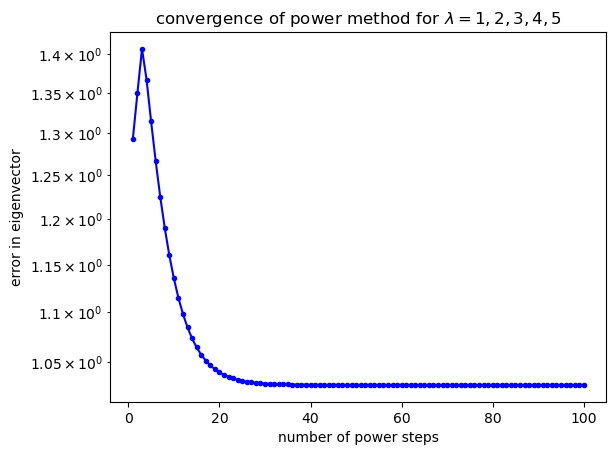

PyObject Text(0.5, 1.0, 'convergence of power method for $\\lambda=1,2,3,4,5$')

In [112]:
d = Float64[]
y = x
for i = 1:100
    y = A*y
    y = y / norm(y)
    push!(d, min(norm(y - X[:,1]), norm(-y - X[:,1]))) # pick the better of the two signs
end
semilogy(1:length(d), d, "b.-")
xlabel("number of power steps")
ylabel("error in eigenvector")
title(L"convergence of power method for $\lambda=1,2,3,4,5$")

In [12]:
semilogy(1:length(d), d, "b.-")
semilogy(1:length(d), (4/5).^(1:length(d)), "k--")
xlabel("number of power steps")
ylabel("error in eigenvector")
title(L"convergence of power method for $\lambda=1,2,3,4,5$")
legend(["error", L"(4/5)^n"])

LoadError: UndefVarError: d not defined

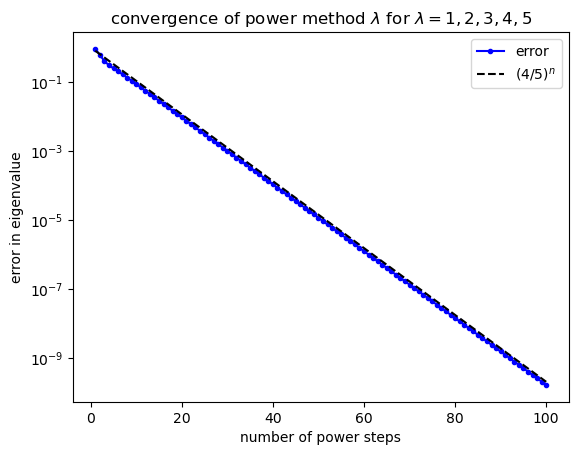

PyObject <matplotlib.legend.Legend object at 0x7f514c416730>

In [13]:
Δλ = Float64[]
y = x
for i = 1:100
    y = A*y
    y = y / norm(y)
    λ̃ = (y'A*y) / (y'y)
    push!(Δλ, abs(λ̃ - 5))
end
semilogy(1:length(Δλ), Δλ, "b.-")
semilogy(1:length(Δλ), (4/5).^(1:length(Δλ)), "k--")
xlabel("number of power steps")
ylabel("error in eigenvalue")
title(L"convergence of power method $\lambda$ for $\lambda=1,2,3,4,5$")
legend(["error", L"(4/5)^n"])

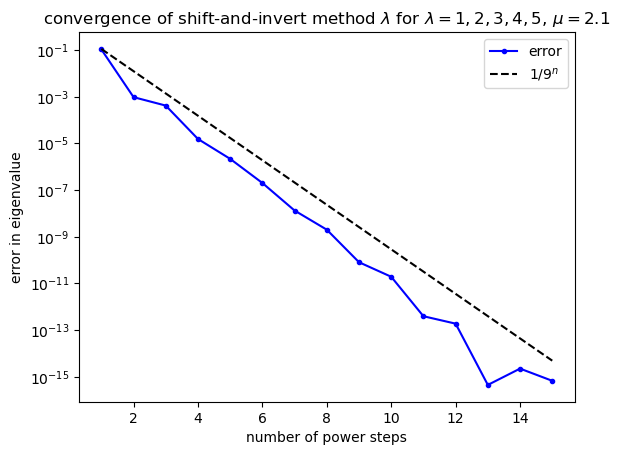

PyObject <matplotlib.legend.Legend object at 0x7f51291637f0>

In [14]:
Δλ = Float64[]
y = x
for i = 1:15
    y = (A - 2.1I) \ y
    y = y / norm(y)
    λ̃ = (y'A*y) / (y'y)
    push!(Δλ, abs(λ̃ - 2))
end
semilogy(1:length(Δλ), Δλ, "b.-")
semilogy(1:length(Δλ), (1/9).^(1:length(Δλ)), "k--")
xlabel("number of power steps")
ylabel("error in eigenvalue")
title(L"convergence of shift-and-invert method $\lambda$ for $\lambda=1,2,3,4,5$, $\mu = 2.1$")
legend(["error", L"1/9^n"])

In [15]:
n = 20
A = randn(n,n)
A = A * diagm(1:n) / A

20×20 Matrix{Float64}:
 20.9125    -10.8892     -9.44299   …   -7.73609   -5.35756    12.0259
 -1.72006     7.12343     0.283059      -2.96325   -5.29498     7.33503
 -3.95539     5.00796    21.3808        -0.364676  -1.7718     -8.86105
  0.756252   -2.92203    -4.93999      -13.9942    -2.66183     9.30327
 -5.3578      0.599839    0.192924       3.27689   -3.34085    -0.579651
 -7.01922     1.80059     9.81075   …   -8.18593   -2.40679    -2.91158
  0.745276   -3.16017     1.29108      -16.3104     0.346451   -3.00586
  1.82196    -7.20982   -11.1864       -11.429     -0.364163   13.6736
 -6.52684     0.425132    9.58669       -6.1122    -6.30888     3.54519
 -5.13565     6.2527      6.70252       -5.18718    0.444311   -9.7363
  0.611453    2.05298    -1.05849   …   -7.75936   -0.792367   -2.56383
 11.6798    -14.0683    -18.5118       -13.401      0.0439315  17.3938
 -2.20189     5.78955    16.6281       -13.7374    -2.66343    -6.6981
  4.48407    -4.89367    -9.64046        7.41

In [17]:
@benchmark potegowav2(A, 1000)

BenchmarkTools.Trial: 
  memory estimate:  469.48 KiB
  allocs estimate:  2004
  --------------
  minimum time:     276.977 μs (0.00% GC)
  median time:      281.525 μs (0.00% GC)
  mean time:        304.109 μs (3.79% GC)
  maximum time:     1.936 ms (72.90% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [69]:
potegowav2(A, 1000)

(13.290997953934685 - 0.26522387252961166im, ComplexF64[0.07197051974111905 - 0.1513240316440958im, 1.3815834175043163e-152 + 0.0im, 0.33700471059726367 - 0.8310474036852612im, 1.4848881516314974e-152 + 0.0im, -0.10012053104438978 - 0.3970959567432038im])

In [64]:
t = @benchmark potegowa(A, 1000)

BenchmarkTools.Trial: 
  memory estimate:  531.67 KiB
  allocs estimate:  6005
  --------------
  minimum time:     386.280 μs (0.00% GC)
  median time:      390.550 μs (0.00% GC)
  mean time:        449.604 μs (10.60% GC)
  maximum time:     5.998 ms (87.11% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [68]:
minimum(t)

BenchmarkTools.TrialEstimate: 
  time:             386.280 μs
  gctime:           0.000 ns (0.00%)
  memory:           531.67 KiB
  allocs:           6005

In [22]:
@benchmark jacobi(A, 1000)

BenchmarkTools.Trial: 
  memory estimate:  9.52 MiB
  allocs estimate:  3000
  --------------
  minimum time:     4.287 ms (0.00% GC)
  median time:      4.541 ms (0.00% GC)
  mean time:        5.115 ms (9.50% GC)
  maximum time:     12.422 ms (19.04% GC)
  --------------
  samples:          973
  evals/sample:     1

In [27]:
AJ = jacobi(A, 1000)
diag(AJ)[end:-1:1]

20-element Vector{Float64}:
 -4.731291994890697
 -5.017726986138788
  2.3324470667947423
  2.7257566026284494
  3.178368294616821
  3.6110745514363147
  9.360232785792633
  8.181818952887252
 11.692415187343975
  8.049701315968308
 16.771643416043865
 13.930367181622508
  7.560061734567803
 12.543775559164649
 17.798450431914
 15.853875707780798
 15.186703836650835
 22.119117623473525
 22.004190466150128
 26.849018266192857

In [29]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
20-element Vector{Float64}:
  0.9999999999999964
  1.9999999999999987
  2.9999999999999885
  4.000000000000011
  4.999999999999972
  6.000000000000039
  7.000000000000003
  8.000000000000016
  9.000000000000014
 10.000000000000002
 10.999999999999932
 11.999999999999979
 12.999999999999995
 14.000000000000004
 14.999999999999929
 15.999999999999995
 17.000000000000053
 18.000000000000025
 19.000000000000014
 19.999999999999886
vectors:
20×20 Matrix{Float64}:
 -0.0613663   0.197052    0.268591     …  -0.337033     -0.382286
 -0.130711    0.145678    0.430134        -0.264568      0.0832707
 -0.264628    0.455925    0.336752        -0.0557612     0.0407315
  0.0739046   0.111735   -0.173188        -0.121911      0.104001
 -0.456475    0.0433079   0.479782         0.193523      0.163271
 -0.121774    0.117859    0.240288     …   0.0823108     0.354644
  0.0586973   0.529416   -0.0209935        0.269704     -0.059467
  0.013

In [62]:
@benchmark QR_eigen(A, 1000)

LoadError: InexactError: Float64(0.6666666666666666 - 0.6666666666666666im)

In [31]:
QR_eigen(A, 1000)

20×20 Matrix{Float64}:
 20.0           -0.0213798     -0.162122      …   -8.57848        -3.46385
  4.83786e-23   19.0            0.315238          70.384           1.37875
  9.66595e-47    2.21142e-24   18.0              -19.009         -41.4411
  2.03656e-71    1.2521e-48     1.91776e-25      -42.9578         -4.00564
  1.73792e-97   -1.54061e-74   -1.8484e-52        39.0927        -31.7753
 -5.01704e-126   1.61574e-104   2.47076e-79   …   16.008          31.6683
 -7.32661e-157  -1.28118e-132   8.20981e-109      21.4177          4.49532
  2.3768e-187    1.02107e-165  -8.27054e-141      15.9393        -18.4702
 -7.43302e-222   2.83206e-199  -1.3805e-176      -21.7917         -4.87153
 -1.33708e-261   1.61913e-237   2.01235e-214     -17.6287        -23.8912
 -2.28084e-301  -7.77123e-279  -2.42632e-255  …   -4.17097        -0.00950428
  0.0            0.0            4.79132e-301       3.21755        -2.46212
  0.0            0.0            0.0               -9.94416        11.333
  0.0 

In [32]:
diag(QR_eigen(A, 1000))[end:-1:1]

20-element Vector{Float64}:
  0.999999999999994
  2.00000000000001
  2.9999999999999893
  4.000000000000016
  4.999999999999979
  6.00000000000001
  7.000000000000008
  7.999999999999995
  9.000000000000032
 10.000000000000002
 10.999999999999982
 12.0
 12.999999999999993
 13.999999999999957
 15.000000000000009
 15.999999999999977
 17.000000000000007
 17.999999999999968
 19.000000000000007
 20.00000000000002

In [37]:
n = 20
A = randn(n,n)
# A = A * diagm(1:n) / A

20×20 Matrix{Float64}:
  0.308053   -0.525818  -0.993163   …  -0.566811    0.660125   -0.727787
  0.632478   -1.28355    0.842912      -0.734535    0.496948    0.356412
  0.43535     0.266058   0.261779      -0.054806   -0.215695   -0.0540977
 -0.915474    0.692792  -0.0186995     -0.309023   -2.46702    -0.196821
  0.363486   -0.818598  -0.700969       3.1138     -0.839952    0.997284
  1.37454    -0.471057  -0.600922   …  -1.79896     1.20341     0.264794
  0.453901   -0.374045   0.85748        0.24965    -0.40141     0.909651
 -0.190765   -0.293365   0.341292      -0.48161     0.429542   -0.183044
  0.644541   -1.04879    0.482769       0.8432      0.509924   -0.35778
 -0.505431    1.39183   -0.145637       0.0258939   2.84549    -0.621354
 -1.46019    -1.11636    1.33317    …  -1.08144    -0.998697   -0.849883
  0.234902    0.478558   1.33159        1.20194    -0.580354    0.63713
 -0.0892525   0.570833   0.0845472      1.63519     1.02691     0.0441987
 -0.0314625   1.40459    0.8

In [50]:
A = [1 0 2+2im 0 3-3im; 0 4 0 5 0; 6-6im 0 7 0 8+8im; 0 9 0 1 0; 2+2im 0 3-3im 0 4];

In [51]:
B = Hermitian(A)


5×5 Hermitian{Complex{Int64}, Matrix{Complex{Int64}}}:
 1+0im  0+0im  2+2im  0+0im  3-3im
 0+0im  4+0im  0+0im  5+0im  0+0im
 2-2im  0+0im  7+0im  0+0im  8+8im
 0+0im  5+0im  0+0im  1+0im  0+0im
 3+3im  0+0im  8-8im  0+0im  4+0im

In [42]:
B = B * diagm(1:n) / B

20×20 Matrix{Float64}:
 11.4552     10.1987     -5.83089   …  -0.135292  -10.993      3.12926
  3.15473    30.7657     -6.05212      -2.31922   -17.5229     1.68786
 -9.03808   -18.6372     14.4935        6.71148    24.1385    -2.10958
 12.2803     25.2149     -8.98997      -0.738657  -22.1425     1.71365
 -1.06273   -13.7264      0.68652       8.44032    14.2116    -3.88773
  1.35588     8.68528    -2.67687   …  -0.47267    -2.85724    2.47959
  4.29287     6.5856     -2.90575       0.100665  -14.341      0.605505
 -0.244456  -21.8105      4.12544       9.16239    18.8858    -2.65202
 -8.46209   -26.1572      7.08169       3.91141    26.4081    -2.58635
  0.885053    1.8653      0.141629      0.642285    2.82103    2.64934
 -3.89759   -15.0086      1.12385   …   3.58649     4.67089    0.38937
 -6.64808   -37.4446     11.1116        8.29416    37.8229    -4.77086
 -4.75307   -35.8477      6.90695       7.36994    33.1396    -5.34825
 -2.59437    -5.46154     3.02755       1.70593     2

In [38]:
@benchmark jacobi(B, 1000)

BenchmarkTools.Trial: 
  memory estimate:  9.52 MiB
  allocs estimate:  3001
  --------------
  minimum time:     4.335 ms (0.00% GC)
  median time:      4.700 ms (0.00% GC)
  mean time:        5.299 ms (9.81% GC)
  maximum time:     10.078 ms (23.85% GC)
  --------------
  samples:          939
  evals/sample:     1

In [60]:
AJ = jacobi(B, 1000)
diag(AJ)[end:-1:1]

LoadError: InexactError: Float64(0.524046652662639 + 0.524046652662639im)

In [61]:
eigen(B)

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
5-element Vector{Float64}:
 -8.320686904340281
 -2.7201532544552682
  3.1496012907501054
  7.720153254455275
 17.171085613590215
vectors:
5×5 Matrix{ComplexF64}:
 -0.231509+0.392692im     …  -0.129023-0.00628656im
       0.0+0.0im                   0.0+0.0im
 -0.375584-0.436027im        -0.547024-0.496283im
       0.0-6.93889e-18im           0.0-1.38778e-17im
   0.67898+0.0im             -0.661651-0.0im